<h1 align = "center">Get a Room : ML Hackathon</h1>

---

**Duration:** July 22 (10:00 PM IST) to August 21 (10:00 PM IST), 2022

## Code Imports

**PEP8 Style Guide** lists out the following [*guidelines*](https://peps.python.org/pep-0008/#imports) for imports:
 1. Imports should be on separate lines,
 2. Import order should be:
    * standard library/modules,
    * related third party imports,
    * local application/user defined imports
 3. Wildcard import (`*`) should be avoided, else specifically tagged with **`# noqa: F403`** as per `flake8` [(ignoring errors)](https://flake8.pycqa.org/en/3.1.1/user/ignoring-errors.html).
 4. Avoid using relative imports; use explicit imports instead.

In [33]:
import os # funadamental library for handling
import sys # append additional directories to list
# import glob # unix style functionalities for patterns
import time # for handing time objects, and pretty prints
import warnings # display specified user warnings as required
import datetime as dt # standard dattime handling and manipulation module

In [13]:
from tqdm import tqdm as TQ # library for displaying progress bar

[**`logging`**](https://docs.python.org/3/howto/logging.html) is a standard python module that is meant for tracking any events that happen during any software/code operations. This module is super powerful and helpful for code debugging and other purposes. The next section defines a `logging` configuration in **`../logs/`** directory. Modify the **`LOGS_DIR`** variable under *Global Arguments* to change the default directory. The module is configured with a simplistic approach, such that any `print())` statement can be update to `logging.LEVEL_NAME()` and the code will work. Use logging operations like:

```python
 >> logging.debug("This is a Debug Message.")
 >> logging.info("This is a Information Message.")
 >> logging.warning("This is a Warning Message.")
 >> logging.error("This is a ERROR Message.")
 >> logging.critical("This is a CRITICAL Message.")
```

Note: some directories related to logging is created by default. This can be updated/changed in the following configuration section.

In [2]:
import logging # configure logging on `global arguments` section, as file path is required

### Data Frame, NumPy and Visualization Libraries

Daily use libraries like `pandas`, `numpy` is available for import along with *display* settings in a python notebook. Generally, I prefer to use `matplotlib` and `seaborn` which is imported below with certain configurations as mentioned. Stylesheet is available [here](https://gitlab.com/ZenithClown/computer-configurations-and-setups/-/blob/master/default-style.mplstyle), and the code snippets (for VS code) is available [here](https://gitlab.com/ZenithClown/computer-configurations-and-setups/-/tree/master/template/snippets/vscode).

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline
sns.set_style('whitegrid');
plt.style.use('default-style'); # https://gitlab.com/ZenithClown/computer-configurations-and-setups
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 15)
np.set_printoptions(precision = 3, threshold = 15)
pd.options.display.float_format = '{:,.2f}'.format

### Machine Learning Libraries

Well, Machine Learning involves pretty much everything from ETA to model development and deployment (for E2E applications). This section can be used to import basic and/or standard libraries to acheive the same. Uncomment and import any of the `sklearn` libraries below. In addition, boilerplate for importing `tensorflow` is also provided.

In [39]:
# from sklearn.metrics import 
# from sklearn.model_selection import 
# from sklearn.preprocessing import 

In [10]:
# import tensorflow as tf
# print(f"Tensorflow Version: {tf.__version__}")

# # check physical devices
# # the given function is available only in tf 2x
# tf.config.list_physical_devices()

Tensorflow Version: 2.8.0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
if len(tf.config.list_physical_devices(device_type = "GPU")):
    # https://stackoverflow.com/q/38009682/6623589
    # https://stackoverflow.com/a/59179238/6623589
    print("GPU Computing Available.")
else:
    print("GPU Computing Not Available. If `GPU` is present, check configuration.")

GPU Computing Available.


In [47]:
from xgboost import XGBRFRegressor

## Global Argument(s)

The global arguments are *notebook* specific, however they may also be extended to external libraries and functions on import. The *boilerplate* provides a basic ML directory structure which contains a directory for `data` and a separate directory for `output`. In addition, a separate directory (`data/processed`) is created to save processed dataset such that preprocessing can be avoided.

In [16]:
ROOT = "." # the document root is one level up, that contains all code structure
DATA = os.path.join(ROOT, "dataset") # the directory contains all data files, subdirectory (if any) can also be used/defined

# processed data directory can be used, such that preprocessing steps is not
# required to run again-and-again each time on kernel restart
PROCESSED_DATA = os.path.join(DATA, "processed")

# additional data directory can be project specific, or may be available from a global datasets collections/websites
# these data are either directly imported from URL and/or saved in the `additional` directory as provided below
ADDITIONAL_DATA = os.path.join(DATA, "additional")

In [5]:
# long projects can be overwhelming, and keeping track of files, outputs and
# saved models can be intriguing! to help this out, `today` can be used. for
# instance output can be stored at `output/<today>/` etc.
# `today` is so configured that it permits windows/*.nix file/directory names
today = dt.datetime.strftime(dt.datetime.strptime(time.ctime(), "%a %b %d %H:%M:%S %Y"), "%a, %b %d %Y")
print(f"Code Execution Started on: {today}") # only date, name of the sub-directory

Code Execution Started on: Mon, Aug 08 2022


In [156]:
OUTPUT_DIR = os.path.join(ROOT, "output", today)
os.makedirs(OUTPUT_DIR, exist_ok = True) # create dir if not exist

# in addition create directory for images, saved models
IMAGE_DIR = os.path.join(ROOT, "output", "images", today)
MODEL_DIR = os.path.join(ROOT, "output", "savedmodels", today)

os.makedirs(IMAGE_DIR, exist_ok = True) # create dir if not exist
os.makedirs(MODEL_DIR, exist_ok = True) # create dir if not exist

# also create directory for `logs`
LOGS_DIR = os.path.join(os.sep, "D:", os.sep, "logs", "GET-ROOM ML HACKATHON") # enter project code to distinguish
os.makedirs(LOGS_DIR, exist_ok = True)

In [7]:
print(LOGS_DIR) # logs file will be generated here

D:\logs\GET-ROOM ML HACKATHON


In [8]:
logging.captureWarnings(True) # send warnings to log file automatically https://stackoverflow.com/a/37979724/6623589
logging.basicConfig(
    filename = os.path.join(LOGS_DIR, f"{today}.log"), # change `reports` file name
    filemode = "a", # append logs to existing file, if file exists
    format = "%(asctime)s - %(name)s - CLASS:%(levelname)s:%(levelno)s:L#%(lineno)d - %(message)s",
    level = logging.DEBUG
)

## User Defined Function(s)

It is recommended that any UDFs are defined outside the scope of the *jupyter notebook* such that development/editing of function can be done more practically. As per *programming guidelines* as [`src`](https://fileinfo.com/extension/src) file/directory is beneficial in code development and/or production release. However, *jupyter notebook* requires *kernel restart* if any imported code file is changed in disc, for this frequently changing functions can be defined in this section.

**Getting Started** with **`PYTHONPATH`**

One must know what are [Environment Variable](https://medium.com/chingu/an-introduction-to-environment-variables-and-how-to-use-them-f602f66d15fa) and how to call/use them in your choice of programming language. Note that an environment variable is *case sensitive* in all operating systems (except windows, since DOS is not case sensitive). Generally, we can access environment variables from terminal/shell/command prompt as:

```shell
# macOS/*nix
echo $VARNAME

# windows
echo %VARNAME%
```

Once you've setup your system with [`PYTHONPATH`](https://bic-berkeley.github.io/psych-214-fall-2016/using_pythonpath.html) as per [*python documentation*](https://docs.python.org/3/using/cmdline.html#envvar-PYTHONPATH) is an important directory where any `import` statements looks for based on their order of importance. If a source code/module is not available check necessary environment variables and/or ask the administrator for the source files.

In [10]:
def read_file(filepath : str) -> pd.DataFrame:
    """
    Read the given `csv` file as provided during for the competition. There
    are three files `train`, `test` and `sample_submission` representing the
    training, testing and sample submission file. All the files are as per
    general convention.
    
    The function reads a particular file, pre-process some of the sections and
    finally returns a processed dataframe.
    """
    
    data = pd.read_csv(filepath, index_col = "Property_ID")
    return data.copy() # deep copy the frame

## Read Input File(s)

A typical machine learning project revolves around six important stages (as available in [Amazon ML Life Cycle Documentation](https://docs.aws.amazon.com/wellarchitected/latest/machine-learning-lens/well-architected-machine-learning-lifecycle.html)). The notebook boilerplate is provided to address two pillars:

 1. **Data Processing:** An integral part of any machine learning project, which is the most time consuming step! A brief introduction and best practices is available [here](https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d).
 2. **Model Development:** From understanding to deployment, this section address development (training, validating and testing) of an machine learning model.

![ML Life Cycle](https://docs.aws.amazon.com/wellarchitected/latest/machine-learning-lens/images/ml-lifecycle.png)

In [21]:
train, test, sample = [read_file(os.path.join(DATA, f"{filename}.csv")) for filename in TQ(["train", "test", "sample_submission"])]

# print additional infos about the file
print(train.shape, test.shape)
print("Prediction Columns : ", [cols for cols in train.columns if cols not in test.columns])

# print memory usage, later apply optimization techniques
print(f"Memory Usage : {train.memory_usage(deep = True).sum() / 1024 ** 2:.2f} MB")

train.sample(5) # display sample records

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 39.81it/s]

(39499, 14) (10500, 13)
Prediction Columns :  ['Habitability_score']
Memory Usage : 20.11 MB


,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
Property_ID,,,,,,,,,,,,,,
0x1533,Duplex,626,5.00,2,Fully Furnished,0.00,No,All time,2.91,Slightly below average,Low,56.00,4.30,80.67
0x4000,Single-family home,1501,4.00,4,Semi_Furnished,NaN,No,All time,9.07,Slightly below average,High,168.00,4.00,87.12
0xa367,Single-family home,1111,4.00,4,Semi_Furnished,1.00,No,Once in a day - Evening,5.11,Slightly below average,Medium,117.00,2.89,71.29
0x7dd7,Apartment,508,3.00,1,Semi_Furnished,1.00,No,Once in a day - Morning,6.81,Well below average,Medium,135.00,3.80,81.82
0x42fc,Container Home,490,2.00,2,Unfurnished,0.00,Yes,Once in a day - Morning,6.00,Well below average,Medium,154.00,4.41,91.82


### Data Validation

In addition to statistical data validation, a basic validation between the training and testing set is necessary. This include: finding if there is any mismatch of the *category* between the training and testing set.

In [34]:
CATEGORICAL_COLUMNS = train.select_dtypes(include = ["object"]).columns

for col in CATEGORICAL_COLUMNS:
    print(f"Categorical Column Name : {col}")
    
    condition = any(train[col].sort_values().unique() == test[col].sort_values().unique())
    if condition:
        print(f"  > Columns Matched, Unique Values : {train[col].unique()}")
    else:
        warnings.warn("Mis-Matched Categories in `training` and `testing` Data.")

Categorical Column Name : Property_Type
  > Columns Matched, Unique Values : ['Apartment' 'Bungalow' 'Single-family home' 'Duplex' '#R%$G&867'
 'Container Home']
Categorical Column Name : Furnishing
  > Columns Matched, Unique Values : ['Semi_Furnished' 'Unfurnished' 'Fully Furnished' nan]
Categorical Column Name : Power_Backup
  > Columns Matched, Unique Values : ['No' 'Yes' 'NOT MENTIONED']
Categorical Column Name : Water_Supply
  > Columns Matched, Unique Values : ['Once in a day - Morning' 'Once in a day - Evening' 'All time'
 'NOT MENTIONED' 'Once in two days']
Categorical Column Name : Crime_Rate
  > Columns Matched, Unique Values : ['Slightly below average' 'Well below average' 'Well above average' nan
 'Slightly above average']
Categorical Column Name : Dust_and_Noise
  > Columns Matched, Unique Values : ['Medium' nan 'High' 'Low']


#### Base Model Performance

Let's do a *point blank approach* and randomly fit the `xgboost` model on numeric columns and fill null data with `median` (as we have yet not done any statistical analysis yet) and call this as the [base model]().

In [50]:
train_, test_ = train.select_dtypes(exclude = ["object"]).copy(), test.select_dtypes(exclude = ["object"]).copy()
train_.sample() # just check one numeric data row

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
Property_ID,,,,,,,,
0xc2c,1011,4.00,2,0.00,4.91,107.00,3.85,79.07


In [142]:
values = {col : np.median(np.array(list(train_[col].dropna().values) + list(test_[col].dropna().values))) for col in TQ(test_.columns)}

# fillna with `median` values on combined values from total dataset
test_.fillna(values, inplace = True)
train_.fillna(values, inplace = True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 179.68it/s]


In [144]:
logging.info("Created Dataset for `basemodel` Evaluation.")

In [148]:
basemodel = XGBRFRegressor()
basemodel.fit(train_.drop(columns = ["Habitability_score"]), train_["Habitability_score"])

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [157]:
y_predicted_ = basemodel.predict(test_) # find the predictions
pd.DataFrame({
    "Property_ID" : test_.index,
    "Habitability_score" : y_predicted_
}).to_csv(os.path.join(OUTPUT_DIR, "base_model_submission_xgboost.csv"), index = False)

**Base Model Score:** 36.33460

#### Missing Value Analysis

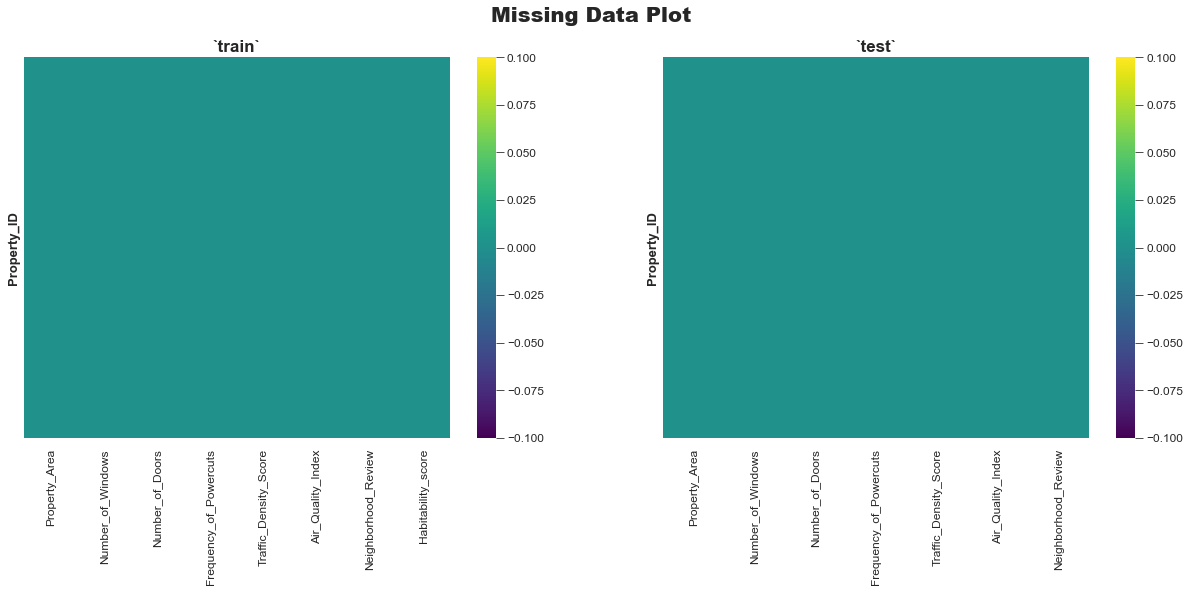

In [143]:
plt.subplot(121)
sns.heatmap(train_.isnull(), cmap = "viridis", yticklabels = False)
plt.title("`train`")

plt.subplot(122)
sns.heatmap(test_.isnull(), cmap = "viridis", yticklabels = False)
plt.title("`test`")

plt.suptitle("Missing Data Plot")
plt.show()

### Data Correlation

<AxesSubplot:>

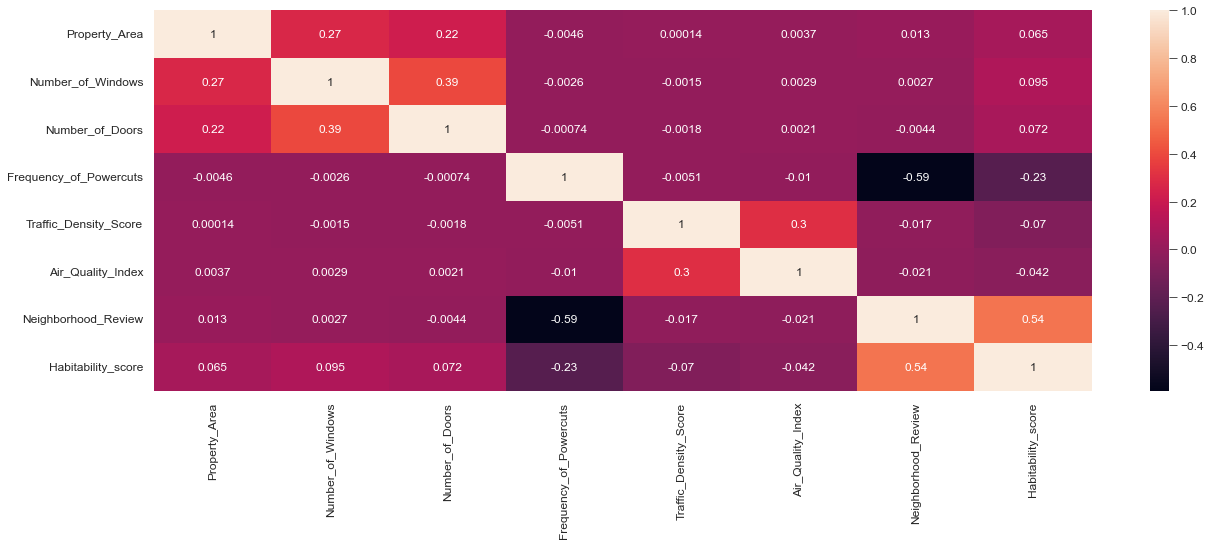

In [46]:
sns.heatmap(train.corr(), annot = True)